In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./Data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
# One-Hot encoding the dataFrame
df_one = pd.get_dummies(df, dtype=int)
df_one

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [10]:
X = df_one.drop("charges",axis=1)
y = df_one["charges"]

In [11]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [12]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [30]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["mae"])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13345.7109 - mae: 13345.7109
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13337.1719 - mae: 13337.1719
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13328.0186 - mae: 13328.0186
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13317.6123 - mae: 13317.6123
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13305.4932 - mae: 13305.4932
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13290.9619 - mae: 13290.9619
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 13273.3506 - mae: 13273.3506
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 13251.9326 - mae: 13251.9326
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 13226.1191 - mae: 13226.1191
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 13195.45

In [31]:
# check the results on the test data
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7524.3267 - mae: 7524.3267


[7524.32666015625, 7524.32666015625]

In [19]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

### Our model isn't performing too well
1. Add an extra layer with more hidden units
2. Train for longer

In [24]:
# for this model we are going to add an extra layer
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model2.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])
model2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13279.7461 - mae: 13279.7461
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13107.1084 - mae: 13107.1084
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12756.2715 - mae: 12756.2715
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12079.1133 - mae: 12079.1133
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10961.6211 - mae: 10961.6211
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9534.8975 - mae: 9534.8975
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8206.8662 - mae: 8206.8662
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7546.0371 - mae: 7546.0371
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7430.5361 - mae: 7430.5361
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7409.3745 - mae:

In [25]:
model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 4882.7671 - mae: 4882.7671


[4882.76708984375, 4882.76708984375]

In [34]:
# For this model we are going to train longer
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model3.compile(loss = tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics = ["mae"])

history = model3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13266.4375 - mae: 13266.4375
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13103.1709 - mae: 13103.1709
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12762.6602 - mae: 12762.6602
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12099.3350 - mae: 12099.3350
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10990.2959 - mae: 10990.2959
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9562.2061 - mae: 9562.2061
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8230.8213 - mae: 8230.8213
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7550.8896 - mae: 7550.8896
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7429.4121 - mae: 7429.4121
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7408.1460 - mae:

In [33]:
model3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3484.1477 - mae: 3484.1477


[3484.147705078125, 3484.147705078125]

Text(0.5, 0, 'epochs')

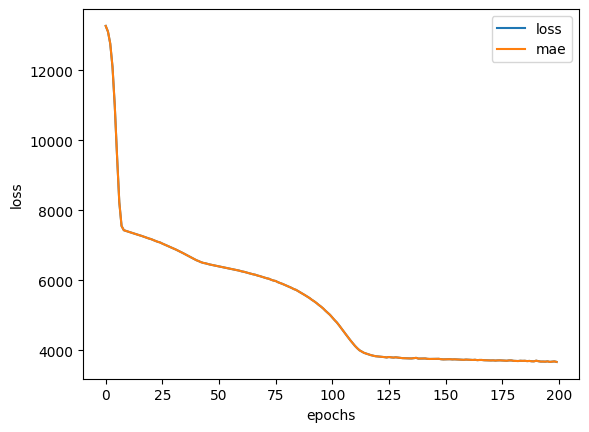

In [36]:
# plot history (also known as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

#### How long should we train for?
It depends. However, Tensorflow has a solution! It's called EarlyStopping Callback, whcih is a Tensorflow component you can add to your model to stop training once it stops improving a certain metric.

### Processing data (normalization and standardization)
In terms of scaling values, neural networks tend to prefer normalization.

We're gonna start from scratch, but this time we're gonna scale the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [43]:
df1 = pd.read_csv('./Data/insurance.csv')
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [44]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: ylabel='Frequency'>

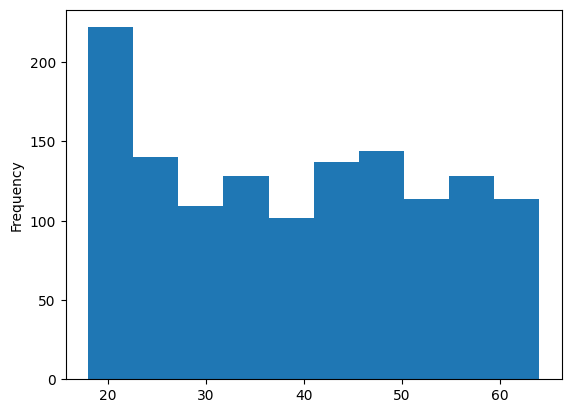

In [45]:
df1["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

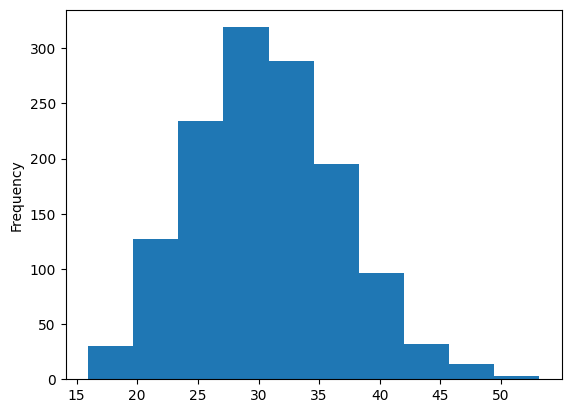

In [46]:
df1["bmi"].plot(kind="hist")

In [47]:
df1["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

#### We wanted to get these 15 to 20, 0 to 5 and 20 to 60 between 0 and 1, that what for normalization.

In [42]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [53]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker","region"])
)
# Create X and y
X = df1.drop("charges", axis=1)
y = df1["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fit the column transformer to our training data
ct.fit(X_train, y_train)

# transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [54]:
# what does our data look like
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [55]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [56]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [57]:
tf.random.set_seed(42)

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model4.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13343.7988 - mae: 13343.7988
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13335.1641 - mae: 13335.1641
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13313.1104 - mae: 13313.1104
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13266.8330 - mae: 13266.8330
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13185.6436 - mae: 13185.6436
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13059.0410 - mae: 13059.0410
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12876.5801 - mae: 12876.5801
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12627.9590 - mae: 12627.9590
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12303.1006 - mae: 12303.1006
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11898.73

In [58]:
model4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3437.8831 - mae: 3437.8831


[3437.883056640625, 3437.883056640625]